**Objective 2:  Identify which type of film is profitable**

In [62]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from collections import defaultdict

import pickle

In [5]:
merged_data = pd.read_csv("cleaned_merged_data.csv")

In [71]:
merged_data.head()

,original_language,original_title,popularity,release_date,vote_average,vote_count,runtime_minutes,genres,averagerating,numvotes,release_year
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788,146.0,"Adventure,Fantasy,Mystery",7.7,425530,2010
1,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610,98.0,"Action,Adventure,Animation",8.1,611299,2010
2,en,Iron Man 2,28.515,2010-05-07,6.8,12368,124.0,"Action,Adventure,Sci-Fi",7.0,657690,2010
3,en,Inception,27.920,2010-07-16,8.3,22186,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,2010
4,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,6.1,4229,118.0,"Adventure,Family,Fantasy",5.9,165108,2010


In [28]:
merged_data.columns

Index(['original_language', 'original_title', 'popularity', 'release_date',
       'vote_average', 'vote_count', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'release_year'],
      dtype='object')

In [7]:
merged_data.shape

(16402, 10)

In [8]:
merged_data.dtypes

original_language     object
original_title        object
popularity           float64
release_date          object
vote_average         float64
vote_count             int64
runtime_minutes      float64
genres                object
averagerating        float64
numvotes               int64
dtype: object

In [9]:
merged_data.describe()

,popularity,vote_average,vote_count,runtime_minutes,averagerating,numvotes
count,16402.000000,16402.000000,16402.000000,16402.000000,16402.000000,1.640200e+04
mean,3.888187,5.731478,283.187050,93.605597,5.848488,1.496057e+04
std,5.008357,1.718946,1151.691744,18.710496,1.407888,6.320184e+04
min,0.600000,0.000000,1.000000,3.000000,1.100000,5.000000e+00
25%,0.665000,4.900000,2.000000,84.000000,4.900000,9.700000e+01
50%,1.787000,5.900000,8.000000,91.000000,6.000000,4.220000e+02
75%,5.774750,6.800000,55.000000,101.000000,6.900000,2.889250e+03
max,80.773000,10.000000,22186.000000,724.000000,9.800000,1.841066e+06


In [32]:
df2 = pd.read_csv("cleaned_gross_budget.csv")

In [30]:
df2.head()

,movie,studio,foreign_gross,release_date,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
1,Inception,WB,535700000.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,513900000.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,398000000.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,311500000.0,"May 7, 2010",170000000.0,312433331.0,6.211564e+08


In [31]:
df2.columns

Index(['movie', 'studio', 'foreign_gross', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross'],
      dtype='object')

**Exploratory Data Analysis**

How does the productions budget ralate to the domestic and foreign gross revenue

Analysing profitability across genres and studios

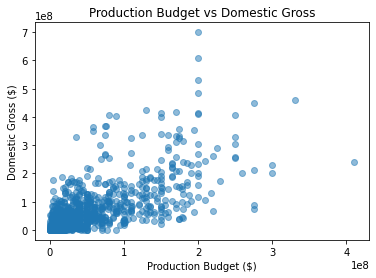

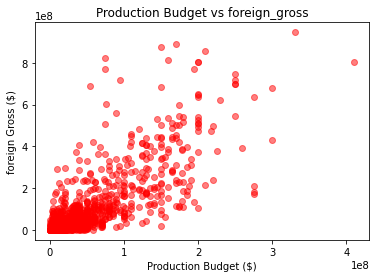

In [34]:
#How does the productions budget ralate to the domestic and worldwide gross revenue

import matplotlib.pyplot as plt

# Scatter plot for Production Budget vs Domestic Gross
plt.scatter(df2['production_budget'], df2['domestic_gross'], alpha=0.5)
plt.title('Production Budget vs Domestic Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Domestic Gross ($)')
plt.show()

# Scatter plot for Production Budget vs Worldwide Gross
plt.scatter(df2['production_budget'], df2['foreign_gross'], alpha=0.5, color='r')
plt.title('Production Budget vs foreign_gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('foreign Gross ($)')
plt.show()


In [37]:
# Create an empty list to store individual genres
genres_list = []

# Split genres in each row and add them directly to genres_list
for genres in merged_data["genres"]:
    genres_list.extend(genres.split(','))

# Count the number of films by genre
genres_sum = Counter(genres_list)

# Calculate the total number of genre entries for percentage calculation
total_genres = sum(genres_sum.values())

# Create a DataFrame from the Counter, including percentage calculation
genre_df = pd.DataFrame(genres_sum.items(), columns=["Genre", "Count"])
genre_df["Percentage"] = (genre_df["Count"] / total_genres) * 100

# Sort the DataFrame by 'Count' in descending order
genre_df = genre_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Display the table
print(genre_df.head(10))
print(" ")
print("The Top five top watched movies are Drama, Comedy, Documentary, Thriller and Horror")

         Genre  Count  Percentage
0        Drama   7252   21.745127
1       Comedy   3799   11.391304
2  Documentary   3142    9.421289
3     Thriller   3106    9.313343
4       Horror   2977    8.926537
5       Action   2006    6.014993
6      Romance   1596    4.785607
7        Crime   1545    4.632684
8    Adventure   1217    3.649175
9      Mystery   1091    3.271364
 
The Top five top watched movies are Drama, Comedy, Documentary, Thriller and Horror


In [63]:
# Calculate profitability per movie
df2['profitability'] = df2['worldwide_gross'] - df2['production_budget']
# Merge the dataframes based on matching titles
merged_df = pd.merge(merged_data, df2, left_on='original_title', right_on='movie', how='inner')

# Display the merged dataframe
print(merged_df)


     original_language              original_title  popularity release_date_x  \
0                   en    How to Train Your Dragon      28.734     2010-03-26   
1                   en                  Iron Man 2      28.515     2010-05-07   
2                   en                   Inception      27.920     2010-07-16   
3                   en                 Toy Story 3      24.445     2010-06-17   
4                   en               Despicable Me      23.673     2010-07-09   
...                ...                         ...         ...            ...   
1239                en     Paul, Apostle of Christ      12.005     2018-03-28   
1240                en          The 15:17 to Paris      11.576     2018-02-09   
1241                en                  Uncle Drew      10.836     2018-06-29   
1242                en                  Proud Mary       9.371     2018-01-12   
1243                en  Bilal: A New Breed of Hero       2.707     2018-02-02   

      vote_average  vote_co

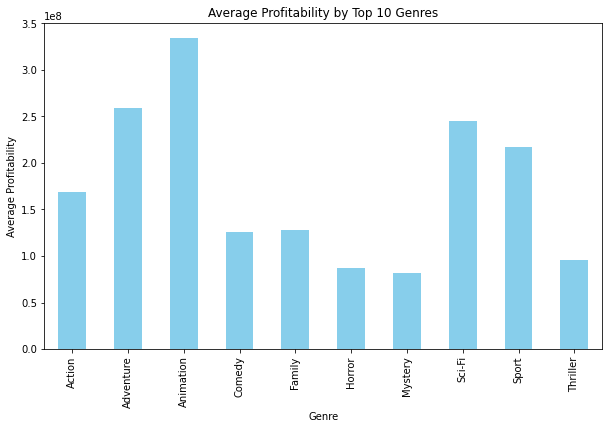

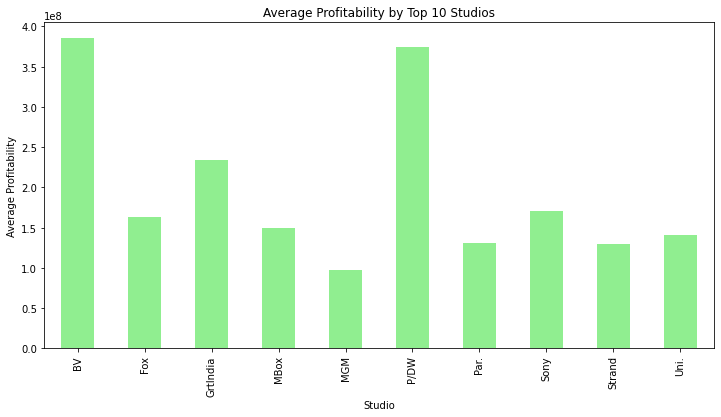

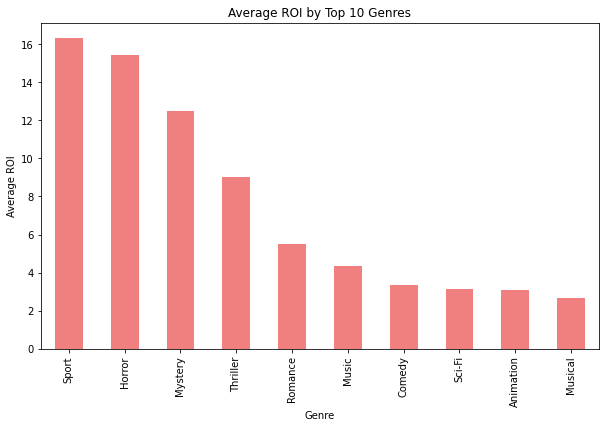

In [ ]:

# Split genres in each row and associate profitability with each genre
split_genres = []
profits = []

for index, row in merged_df.iterrows():
    genre_split = row["genres"].split(',')
    split_genres.extend(genre_split)
    profits.extend([row["profitability"]] * len(genre_split))

# Create a new DataFrame with split genres and profitability
split_genre_df = pd.DataFrame({
    'genre': split_genres,
    'profitability': profits,
    'production_budget': merged_df['production_budget'].repeat(merged_df['genres'].str.split(',').apply(len)).reset_index(drop=True)
})

# Plot for profitability by top 10 genres
top_genres = split_genre_df.groupby('genre')['profitability'].median().nlargest(10).index
avg_profitability = split_genre_df[split_genre_df['genre'].isin(top_genres)].groupby('genre')['profitability'].mean()

plt.figure(figsize=(10, 6))
avg_profitability.plot(kind='bar', color='skyblue')
plt.title('Average Profitability by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Profitability')
plt.xticks(rotation=90)
plt.show()

# Plot for profitability by top 10 studios
top_studios = merged_df.groupby('studio')['profitability'].median().nlargest(10).index
avg_studio_profitability = merged_df[merged_df['studio'].isin(top_studios)].groupby('studio')['profitability'].mean()

plt.figure(figsize=(12, 6))
avg_studio_profitability.plot(kind='bar', color='lightgreen')

plt.title('Average Profitability by Top 10 Studios')
plt.xlabel('Studio')
plt.ylabel('Average Profitability')
plt.xticks(rotation=90)
plt.show()

# Calculate ROI for split_genre_df based on the profitability and production budget
split_genre_df['ROI'] = split_genre_df['profitability'] / split_genre_df['production_budget']

# Now group by genre and get the top 10 genres with the highest median ROI
top_roi_genres = split_genre_df.groupby('genre')['ROI'].median().nlargest(10).index

# Calculate the average ROI for these top genres
avg_roi = split_genre_df[split_genre_df['genre'].isin(top_roi_genres)].groupby('genre')['ROI'].mean()

avg_roi = avg_roi.sort_values(ascending=False)
# Plot the average ROI by top 10 genres
plt.figure(figsize=(10, 6))
avg_roi.plot(kind='bar', color='lightcoral')
plt.title('Average ROI by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.xticks(rotation=90)
plt.show()


**Statistical Distribution**

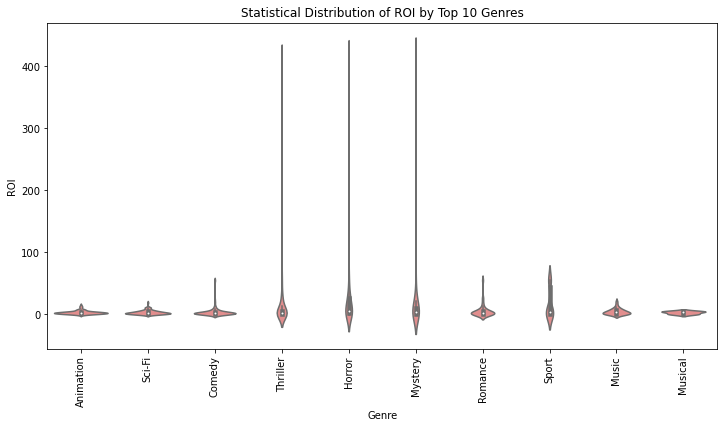

In [64]:
# Violin plot for statistical distribution of ROI by top 10 genres
plt.figure(figsize=(12, 6))
sns.violinplot(data=split_genre_df[split_genre_df['genre'].isin(top_roi_genres)], x='genre', y='ROI', color='lightcoral')
plt.title('Statistical Distribution of ROI by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.xticks(rotation=90)
plt.show()


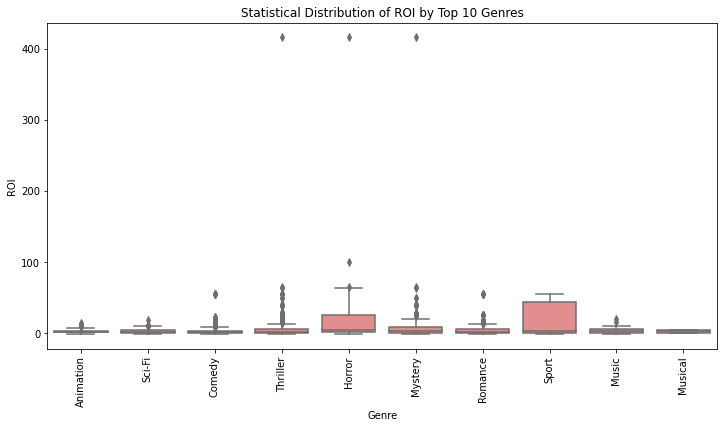

In [65]:
# Box plot for statistical distribution of ROI by top 10 genres
plt.figure(figsize=(12, 6))
sns.boxplot(data=split_genre_df[split_genre_df['genre'].isin(top_roi_genres)], x='genre', y='ROI', color='lightcoral')
plt.title('Statistical Distribution of ROI by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.xticks(rotation=90)
plt.show()


**Correlation Analysis**

In [69]:
import pandas as pd

# Calculate the correlation coefficient between production budget and domestic gross
correlation_domestic = df2['production_budget'].corr(df2['domestic_gross'])
print(f"Correlation between Production Budget and Domestic Gross: {correlation_domestic}")

# Calculate the correlation coefficient between production budget and worldwide gross
correlation_worldwide = df2['production_budget'].corr(df2['worldwide_gross'])
print(f"Correlation between Production Budget and Worldwide Gross: {correlation_worldwide}")


Correlation between Production Budget and Domestic Gross: 0.6744277885879324
Correlation between Production Budget and Worldwide Gross: 0.7669256443309962


                   foreign_gross  production_budget  domestic_gross  \
foreign_gross           1.000000           0.775834        0.845723   
production_budget       0.775834           1.000000        0.674428   
domestic_gross          0.845723           0.674428        1.000000   
worldwide_gross         0.978473           0.766926        0.934533   
profitability           0.952454           0.628724        0.929692   

                   worldwide_gross  profitability  
foreign_gross             0.978473       0.952454  
production_budget         0.766926       0.628724  
domestic_gross            0.934533       0.929692  
worldwide_gross           1.000000       0.981217  
profitability             0.981217       1.000000  


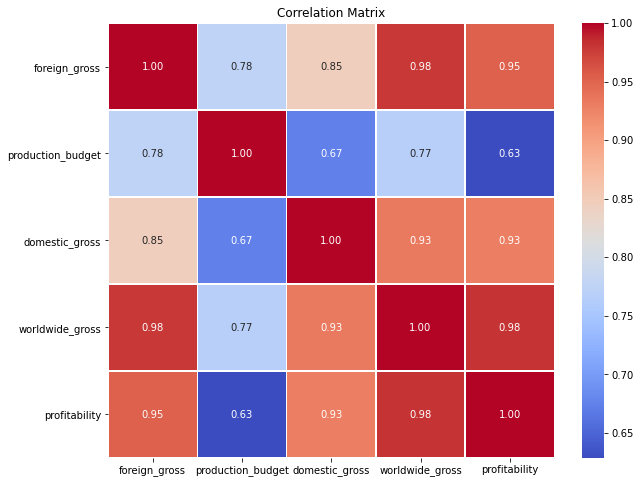

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df2.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Regression Modeling**

In [68]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape data for regression
X = df2['production_budget'].values.reshape(-1, 1)  # Independent variable (Production Budget)
y_domestic = df2['domestic_gross'].values  # Dependent variable (Domestic Gross)
y_worldwide = df2['worldwide_gross'].values  # Dependent variable (Worldwide Gross)

# Create a linear regression model
model_domestic = LinearRegression()
model_worldwide = LinearRegression()

# Fit the model to the data (Domestic)
model_domestic.fit(X, y_domestic)

# Fit the model to the data (Worldwide)
model_worldwide.fit(X, y_worldwide)

# Get the regression coefficients and intercepts
slope_domestic = model_domestic.coef_[0]
intercept_domestic = model_domestic.intercept_

slope_worldwide = model_worldwide.coef_[0]
intercept_worldwide = model_worldwide.intercept_

# Print the results for both domestic and worldwide
print(f"Regression Equation for Domestic Gross: y = {slope_domestic:.2f} * x + {intercept_domestic:.2f}")
print(f"Regression Equation for Worldwide Gross: y = {slope_worldwide:.2f} * x + {intercept_worldwide:.2f}")


Regression Equation for Domestic Gross: y = 0.99 * x + 15616583.92
Regression Equation for Worldwide Gross: y = 3.09 * x + 7474144.85


**Observations:**

**Positive Correlation Between Budget and Revenue:** Both the domestic and foreign revenue scatter plots show a positive trend with the production budget. This suggests that, generally, movies with higher production budgets tend to generate higher revenues. However, the trend is not very strong, as points are widely scattered, indicating high variability.

In both plots, there is a dense cluster of points in the lower budget range. This indicates that many films with smaller budgets tend to have lower domestic and worldwide gross revenues.

**Foreign Gross is Generally Higher:**
The scatter plot for foreign gross (foreign revenue) appears to have a slightly broader spread toward higher revenue values than the domestic gross plot. This suggests that international markets often bring in substantial revenue, potentially making worldwide success more impactful on a film's overall profitability than domestic success alone.

**Studios:**

 Top studios with high profitability exhibit efficient production and distribution networks, benefiting from brand recognition and established market reach.

**ROI Trends:**

 High-ROI genres reveal where budget constraints align well with audience preference, helping to identify cost-effective genres.

**Recommendation:**

For a new movie production business, targeting top-performing genres and partnering with high-profitability studios can maximize initial success. Prioritizing genres with high ROI will help manage budgets and improve profitability, especially when operating under financial constraints.